In [115]:
import pandas as pd
from IPython.core.display import HTML
from rdkit import Chem

In [116]:
df = pd.read_csv("scripts/results/data_12.csv")
print(df.shape)

(765, 32)


/home/mduranfrigola/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Maip', ylabel='IC50Pred'>

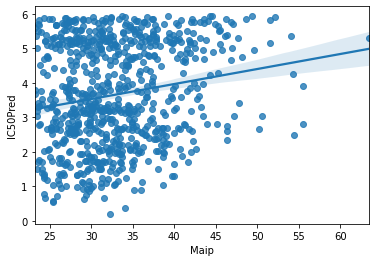

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(df["Maip"], df["IC50Pred"])

In [114]:
df = df[["Smiles", "InchiKey"]]
df.to_csv("/home/mduranfrigola/Desktop/maip.csv", index=False)

In [ ]:
pd.read_csv()

In [88]:
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(df, "Smiles", "Molecule")

from IPython.display import HTML


In [107]:
HTML(df.sample().to_html())

,InchiKey,Smiles,IsTriazoloPyrazine,TriazoloHeteroaryl,TriazoloPhenyl,TriazoloHeteroarylPara,TriazoloHeteroarylMeta,TriazoloHeteroarylOrto,TriazoloNaphthalene,PyrazineEther,PyrazineAmide,MolWt,SLogP,NumRings,Qed,FractionCSP3,FrHalogen,HeavyAtom,Rotatable,Heteroatoms,FrAlkylHalide,SAScore,RAScore,SybaScore,Similarity,Rdkit2dClassifier,IC50Pred,IC50PredUB,IC50PredLB,HighClassifier,WhalesDist3Act
657,RKMVBORGVQLVOD-UHFFFAOYSA-N,OC1(COc2cncc3nnc(-c4ccc(OC(F)F)cc4)n23)CCc2cc(F)c(F)cc21,1,1,1,1,0,0,0,1,0,460.387,3.8837,5,0.440084,0.227273,4,33,6,11,2,3.676623,0.880158,45.956625,0.697674,1.0,1.032525,0.999751,0.783053,0.705476,2.093855


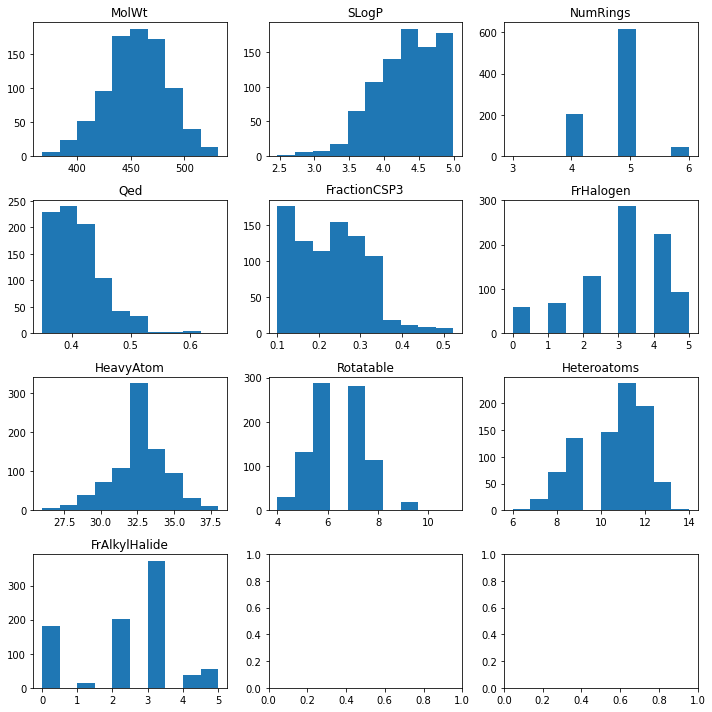

In [103]:
physchem_columns = [
 'MolWt',
 'SLogP',
 'NumRings',
 'Qed',
 'FractionCSP3',
 'FrHalogen',
 'HeavyAtom',
 'Rotatable',
 'Heteroatoms',
 'FrAlkylHalide',
]
df_ = df[physchem_columns]

fig, axs = plt.subplots(4,3, figsize=(10,10))
axs = axs.flatten()
for i, c in enumerate(physchem_columns):
    vals = df_[c]
    ax = axs[i]
    ax.hist(vals)
    ax.set_title(c)
plt.tight_layout()

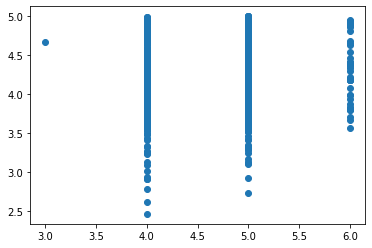

In [104]:
plt.scatter(df_["NumRings"], df["SLogP"])

(array([  1.,   0.,   0., 204.,   0.,   0., 618.,   0.,   0.,  41.]),
 array([3. , 3.3, 3.6, 3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <BarContainer object of 10 artists>)

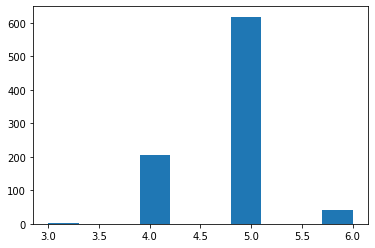

In [84]:
plt.hist(df["NumRings"])

(array([177., 128., 115., 155., 136., 108.,  19.,  11.,   8.,   7.]),
 array([0.1       , 0.14238095, 0.1847619 , 0.22714286, 0.26952381,
        0.31190476, 0.35428571, 0.39666667, 0.43904762, 0.48142857,
        0.52380952]),
 <BarContainer object of 10 artists>)

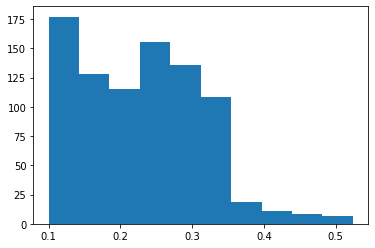

In [95]:
plt.hist(df["FractionCSP3"])

In [44]:
ALPHA = 10

ra_cut = np.percentile(df["RAScore"], ALPHA)
print(ra_cut)

sa_cut = np.percentile(df["SAScore"], 100-ALPHA)
print(sa_cut)

sy_cut = np.percentile(df["SybaScore"], ALPHA)
print(sy_cut)

df[(df["RAScore"] > ra_cut) & (df["SAScore"] < sa_cut) & (df["SybaScore"] > sy_cut)]

0.8196645975112915
3.900636086419299
35.15181592953613


,InchiKey,Smiles,IsTriazoloPyrazine,TriazoloHeteroaryl,TriazoloPhenyl,TriazoloHeteroarylPara,TriazoloHeteroarylMeta,TriazoloHeteroarylOrto,TriazoloNaphthalene,PyrazineEther,...,RAScore,SybaScore,Similarity,Rdkit2dClassifier,IC50Pred,IC50PredUB,IC50PredLB,HighClassifier,WhalesDist3Act,Molecule
3,ITXRLDILDZCPEV-UHFFFAOYSA-N,O=C(c1ccc(-c2nnc3cncc(OCc4ccc(C(F)(F)F)o4)n23)...,1,0,0,0,0,0,0,1,...,0.947699,64.572007,0.367347,1.0,4.715415,5.658208,4.098931,0.464336,4.495414,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,GYDULKFNKUOCND-UHFFFAOYSA-N,FC(F)(F)c1ccc(COc2cncc3nnc(-c4ccc(OCCC5COC5)cc...,1,1,1,1,0,0,0,1,...,0.925341,80.016956,0.634146,1.0,2.618417,3.174826,2.308867,0.587849,3.034156,"<img data-content=""rdkit/molecule"" src=""data:i..."
5,UCPKSYBLIXULJI-UHFFFAOYSA-N,FC(F)(F)c1ccc(COc2cncc3nnc(-c4ccc(OCC5COCO5)cc...,1,1,1,1,0,0,0,1,...,0.936446,60.648414,0.568182,1.0,3.828309,4.708756,2.808827,0.500362,3.579911,"<img data-content=""rdkit/molecule"" src=""data:i..."
7,FZKIXGGJVPBECR-UHFFFAOYSA-N,Fc1cc(CN2CCOCC2)ccc1-c1nnc2cncc(OCc3ccc(C(F)(F...,1,1,1,1,0,1,0,1,...,0.845864,90.451377,0.432990,1.0,3.804507,4.875972,3.280781,0.450545,3.018286,"<img data-content=""rdkit/molecule"" src=""data:i..."
9,DIMAHNNELFYIBM-UHFFFAOYSA-N,O=C(c1ccc(-c2nnc3cncc(OCc4cccc(C(F)(F)F)c4)n23...,1,0,0,0,0,0,0,1,...,0.908898,82.786274,0.386139,1.0,4.164453,5.678488,4.160956,0.364283,4.002350,"<img data-content=""rdkit/molecule"" src=""data:i..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,JYXLCYLDMPCGPW-UHFFFAOYSA-N,N#Cc1ccc(-c2cncc3nnc(OCC(F)(F)c4ccc5c(c4)OCO5)...,1,0,0,0,0,0,0,0,...,0.965697,58.053884,0.285714,1.0,5.465255,5.507662,4.566721,0.574748,3.356177,"<img data-content=""rdkit/molecule"" src=""data:i..."
1597,IDJNDABPDVTCTK-UHFFFAOYSA-N,CCC(COc1cncc2nnc(COCc3cccc(F)c3)n12)c1ccc(F)c(...,1,0,0,0,0,0,0,1,...,0.917063,98.076286,0.446809,1.0,2.916717,4.032528,5.474102,0.366594,3.146432,"<img data-content=""rdkit/molecule"" src=""data:i..."
1598,FYZXWKQHDDIHJI-UHFFFAOYSA-N,Cc1ccc(OCc2nnc3cncc(OCC4(c5ccc(F)c(F)c5)OCCO4)...,1,0,0,0,0,0,0,1,...,0.949375,62.457451,0.525773,1.0,3.753299,4.863203,2.992983,0.411913,4.270033,"<img data-content=""rdkit/molecule"" src=""data:i..."
1599,JXJWVXONTQIJGI-UHFFFAOYSA-N,O=C(NCc1cc(C(F)(F)F)ccn1)c1cncc2nnc(-c3ccc(OC(...,1,1,1,1,0,0,0,0,...,0.982573,114.152949,0.651685,1.0,1.291462,1.310872,1.083887,0.417651,2.513344,"<img data-content=""rdkit/molecule"" src=""data:i..."


(array([ 28., 152.,   0.,   5.,   0., 114., 363.,   0., 221.,   9.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

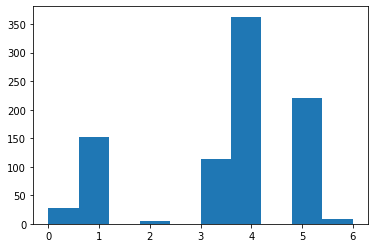

In [65]:
columns = ['TriazoloHeteroaryl',
 'TriazoloPhenyl',
 'TriazoloHeteroarylPara',
 'TriazoloHeteroarylMeta',
 'TriazoloHeteroarylOrto',
 'TriazoloNaphthalene',
 'PyrazineEther',
 'PyrazineAmide']

df_ = df[columns]

fam = []
for r in df_.values:
    fam += [np.sum(r)]
    
plt.hist(fam)

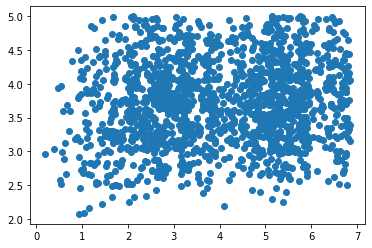

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df["IC50Pred"], df["WhalesDist3Act"])

(array([174.,  79.,  98., 119.,  57.,  83.,  61., 114., 103.,  68.,  49.,
        104., 125.,  70.,  93.,  61.,  60.,  32.,  22.,  29.]),
 array([0.35060796, 0.36998151, 0.38935506, 0.4087286 , 0.42810215,
        0.4474757 , 0.46684925, 0.4862228 , 0.50559635, 0.52496989,
        0.54434344, 0.56371699, 0.58309054, 0.60246409, 0.62183763,
        0.64121118, 0.66058473, 0.67995828, 0.69933183, 0.71870538,
        0.73807892]),
 <BarContainer object of 20 artists>)

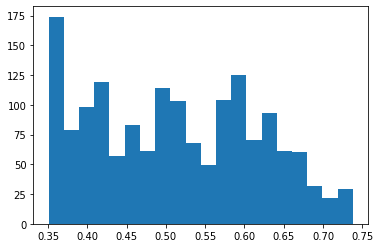

In [52]:
plt.hist(df["HighClassifier"], 20)

In [37]:
import numpy as np
np.percentile(df["SybaScore"], 10)

35.15181592953613

(array([ 27., 211., 331., 368., 266., 227., 115.,  43.,   8.,   5.]),
 array([2.38402713, 2.63436883, 2.88471054, 3.13505224, 3.38539394,
        3.63573564, 3.88607734, 4.13641904, 4.38676074, 4.63710245,
        4.88744415]),
 <BarContainer object of 10 artists>)

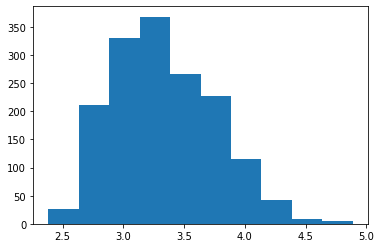

In [31]:
plt.hist(df["SAScore"])

(array([ 2.,  1.,  2.,  2.,  2.,  3.,  4.,  4.,  3.,  5.,  8.,  9., 16.,
        10., 21., 13., 21., 21., 21., 29., 17., 20., 29., 23., 41., 33.,
        40., 39., 41., 52., 42., 36., 43., 48., 35., 41., 47., 49., 44.,
        30., 35., 44., 41., 41., 36., 34., 30., 19., 33., 36., 30., 31.,
        21., 19., 21., 13., 13., 26., 12.,  7.,  7., 12., 14., 10.,  6.,
         7.,  5., 10.,  2.,  1.,  7.,  3.,  6.,  2.,  3.,  1.,  0.,  3.,
         0.,  2.,  2.,  0.,  3.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1.76821223,   3.56013735,   5.35206248,   7.1439876 ,
          8.93591273,  10.72783785,  12.51976298,  14.3116881 ,
         16.10361323,  17.89553835,  19.68746348,  21.4793886 ,
         23.27131373,  25.06323885,  26.85516398,  28.6470891 ,
         30.43901423,  32.23093936,  34.02286448,  35.81478961,
         37.60671473,  39.39863986,  41.19056498,  42.98249011,
         44.77441523,  46.56634036,  48.35826548, 

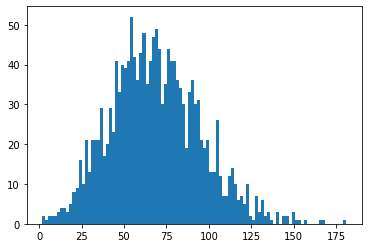

In [38]:
plt.hist(df["SybaScore"], 100)

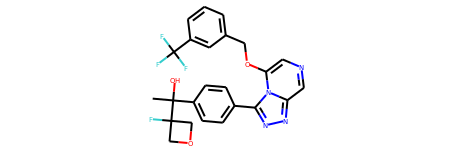

In [17]:
idx = 1197

Chem.MolFromSmiles(df.iloc[idx]["Smiles"])

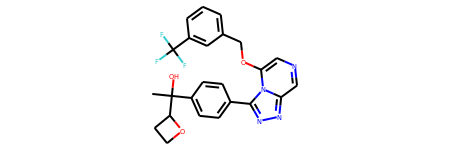

In [18]:
idx = 36

Chem.MolFromSmiles(df.iloc[idx]["Smiles"])

In [25]:
list(df[df["RAScore"] < 0.9])

['InchiKey',
 'Smiles',
 'IsTriazoloPyrazine',
 'TriazoloHeteroaryl',
 'TriazoloPhenyl',
 'TriazoloHeteroarylPara',
 'TriazoloHeteroarylMeta',
 'TriazoloHeteroarylOrto',
 'TriazoloNaphthalene',
 'PyrazineEther',
 'PyrazineAmide',
 'MolWt',
 'SLogP',
 'NumRings',
 'Qed',
 'FractionCSP3',
 'FrHalogen',
 'HeavyAtom',
 'Rotatable',
 'Heteroatoms',
 'FrAlkylHalide',
 'SAScore',
 'RAScore',
 'SybaScore',
 'Similarity',
 'Rdkit2dClassifier',
 'IC50Pred',
 'IC50PredUB',
 'IC50PredLB',
 'HighClassifier',
 'WhalesDist3Act',
 'Molecule']